In [1]:
import sys
sys.path.append("..")
from cavsim2d.cavity import Cavity, Cavities
import pprint
pp = pprint.PrettyPrinter(indent=4)

cavs = Cavities()
cavs.save(project_folder='D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.


In [2]:
# define geometry parameters
n_cells = 9
midcell = [42, 42, 12, 19, 35, 57.7, 103.353]  # <- A, B, a, b, Ri, L, Req
endcell_l = [40.34, 40.34, 10, 13.5, 39, 55.716, 103.353]
endcell_r = [42, 42, 9, 12.8, 39, 56.815, 103.353]

# create cavity
tesla = Cavity(1, midcell, midcell, midcell, beampipe='none')

<Axes: xlabel='$z$ [mm]', ylabel='$r$ [mm]'>

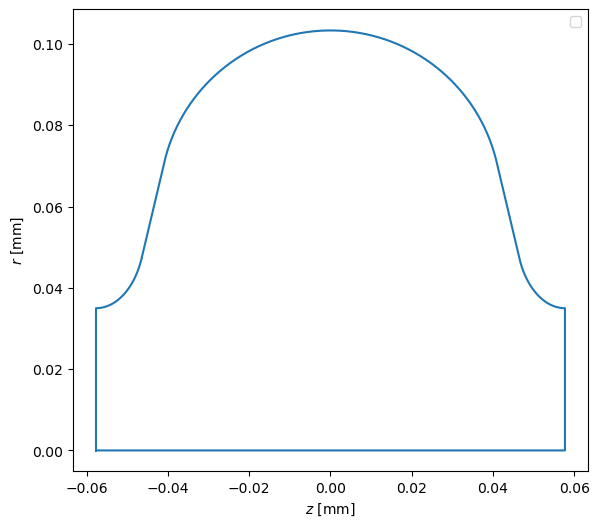

In [3]:
tesla.plot('geometry')
# tesla.inspect()

In [4]:
cavs.add_cavity([tesla], names=['TESLA'], plot_labels=['TESLA'])

In [5]:
cavs.run_eigenmode()
pp.pprint(cavs.eigenmode_qois)

{   'TESLA': {   'Bpk [mT]': 0.00018349031753340774,
                 'Bpk/Eacc [mT/MV/m]': 4.1667329000236775,
                 'Eacc [MV/m]': 4.4036976195994e-05,
                 'Epk [MV/m]': 8.75197684612729e-05,
                 'Epk/Eacc []': 1.9874154862893263,
                 'G [Ohm]': 265.4875908303871,
                 'GR/Q [Ohm^2]': 30170.726700577314,
                 'Hpk [A/m]': 0.14601695522471658,
                 'N Cells': 1,
                 'Normalization Length [mm]': 115.4,
                 'Q []': 28607.124958596112,
                 'R/Q [Ohm]': 113.64270023397283,
                 'Req [mm]': 103.353,
                 'Rsh [MOhm]': 3.25099092622554,
                 'Vacc [MV]': 5.0818670530177075e-06,
                 'ff [%]': -59.44018699889428,
                 'freq [MHz]': 1300.2490645795035,
                 'kcc [%]': 0.0}}


<Axes: xlabel='$z$ [mm]', ylabel='$r$ [mm]'>

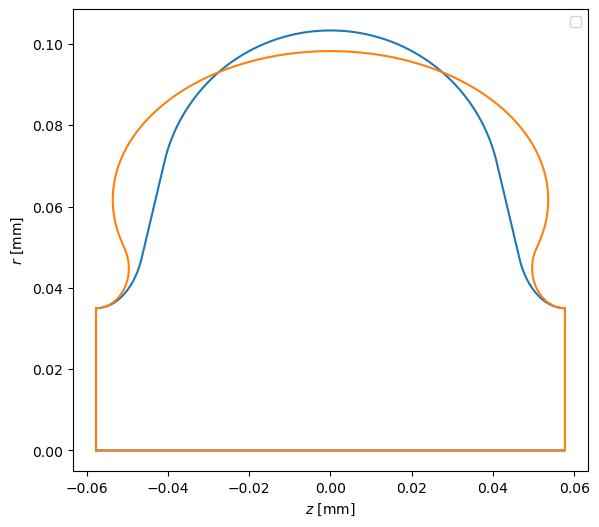

In [6]:
shape_space = {'reentrant': 
                   {'IC': [53.58, 36.58, 8.08, 9.84, 35, 57.7, 98.27],
                    'OC': [53.58, 36.58, 8.08, 9.84, 35, 57.7, 98.27],
                    'OC_R': [53.58, 36.58, 8.08, 9.84, 35, 57.7, 98.27]
                    }
               }

# create cavity
shape = shape_space['reentrant']
reentrant = Cavity(1, shape['IC'], shape['OC'], shape['OC_R'], beampipe='none')
cavs.add_cavity(reentrant, 'reentrant', 'reentrant')
cavs.plot('geometry')

In [7]:
cavs.run_eigenmode()
pp.pprint(cavs.eigenmode_qois)

{   'TESLA': {   'Bpk [mT]': 0.00018349031753340188,
                 'Bpk/Eacc [mT/MV/m]': 4.166732896316198,
                 'Eacc [MV/m]': 4.4036976235175865e-05,
                 'Epk [MV/m]': 8.751976506490553e-05,
                 'Epk/Eacc []': 1.9874154073956711,
                 'G [Ohm]': 265.4875908300441,
                 'GR/Q [Ohm^2]': 30170.726754267253,
                 'Hpk [A/m]': 0.14601695522471192,
                 'N Cells': 1,
                 'Normalization Length [mm]': 115.4,
                 'Q []': 28607.12495855886,
                 'R/Q [Ohm]': 113.64270043635109,
                 'Req [mm]': 103.353,
                 'Rsh [MOhm]': 3.250990932010767,
                 'Vacc [MV]': 5.081867057539295e-06,
                 'ff [%]': -59.4401802305117,
                 'freq [MHz]': 1300.2490645795303,
                 'kcc [%]': 0.0},
    'reentrant': {   'Bpk [mT]': 0.00016972813086237282,
                     'Bpk/Eacc [mT/MV/m]': 3.7392199219873365,
      

{'$E_\\mathrm{pk}/E_\\mathrm{acc} [\\cdot]$': <Axes: label='$E_\\mathrm{pk}/E_\\mathrm{acc} [\\cdot]$', ylabel='$E_\\mathrm{pk}/E_\\mathrm{acc} [\\cdot]$'>,
 '$B_\\mathrm{pk}/E_\\mathrm{acc} \\mathrm{[mT/MV/m]}$': <Axes: label='$B_\\mathrm{pk}/E_\\mathrm{acc} \\mathrm{[mT/MV/m]}$', ylabel='$B_\\mathrm{pk}/E_\\mathrm{acc} \\mathrm{[mT/MV/m]}$'>,
 '$k_\\mathrm{cc} [\\cdot]$': <Axes: label='$k_\\mathrm{cc} [\\cdot]$', ylabel='$k_\\mathrm{cc} [\\cdot]$'>,
 '$R/Q \\mathrm{[\\Omega]}$': <Axes: label='$R/Q \\mathrm{[\\Omega]}$', ylabel='$R/Q \\mathrm{[\\Omega]}$'>,
 '$G \\mathrm{[\\Omega]}$': <Axes: label='$G \\mathrm{[\\Omega]}$', ylabel='$G \\mathrm{[\\Omega]}$'>,
 '$G\\cdot R/Q \\mathrm{[10^{5}\\Omega^2]}$': <Axes: label='$G\\cdot R/Q \\mathrm{[10^{5}\\Omega^2]}$', ylabel='$G\\cdot R/Q \\mathrm{[10^{5}\\Omega^2]}$'>}

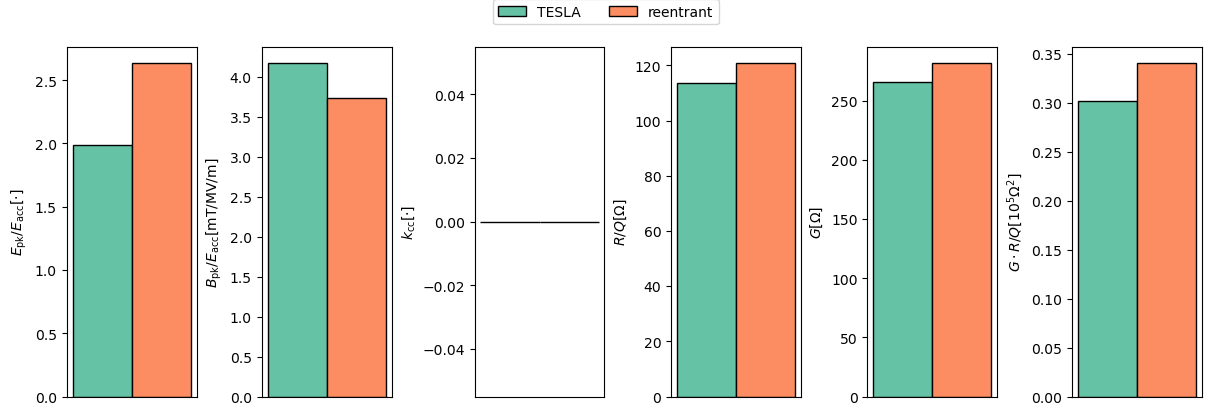

In [8]:
cavs.plot_compare_fm_bar()

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.
{   'TESLA': {   'Bpk [mT]': 0.00018349031753340267,
                 'Bpk/Eacc [mT/MV/m]': 4.166732876727041,
                 'Eacc [MV/m]': 4.403697644220809e-05,
                 'Epk [MV/m]': 8.751976081276545e-05,
                 'Epk/Eacc []': 1.9874153014937792,
                 'G [Ohm]': 265.4875908306976,
                 'GR/Q [Ohm^2]': 30170.727037951092,
                 'Hpk [A/m]': 0.14601695522471253,
                 'N Cells': 1,
                 'Normalization Length [mm]': 115.4,
                 'Q []': 28607.124958629665,
                 'R/Q [Ohm]': 113.64270150461033,
                 'Req [mm]': 103.353,
                 'Rsh [MOhm]': 3.2509909625786393,
                 'Vacc [MV]': 5.0818670814308136e-06,
                 'ff [%]': -59.44014599258887,
                 'freq [MHz]': 1300.2490645794953,
                 'kcc [%]': 0.0},
    'reentra

{'$E_\\mathrm{pk}/E_\\mathrm{acc} [\\cdot]$': <Axes: label='$E_\\mathrm{pk}/E_\\mathrm{acc} [\\cdot]$', ylabel='$E_\\mathrm{pk}/E_\\mathrm{acc} [\\cdot]$'>,
 '$B_\\mathrm{pk}/E_\\mathrm{acc} \\mathrm{[mT/MV/m]}$': <Axes: label='$B_\\mathrm{pk}/E_\\mathrm{acc} \\mathrm{[mT/MV/m]}$', ylabel='$B_\\mathrm{pk}/E_\\mathrm{acc} \\mathrm{[mT/MV/m]}$'>,
 '$k_\\mathrm{cc} [\\cdot]$': <Axes: label='$k_\\mathrm{cc} [\\cdot]$', ylabel='$k_\\mathrm{cc} [\\cdot]$'>,
 '$R/Q \\mathrm{[\\Omega]}$': <Axes: label='$R/Q \\mathrm{[\\Omega]}$', ylabel='$R/Q \\mathrm{[\\Omega]}$'>,
 '$G \\mathrm{[\\Omega]}$': <Axes: label='$G \\mathrm{[\\Omega]}$', ylabel='$G \\mathrm{[\\Omega]}$'>,
 '$G\\cdot R/Q \\mathrm{[10^{5}\\Omega^2]}$': <Axes: label='$G\\cdot R/Q \\mathrm{[10^{5}\\Omega^2]}$', ylabel='$G\\cdot R/Q \\mathrm{[10^{5}\\Omega^2]}$'>}

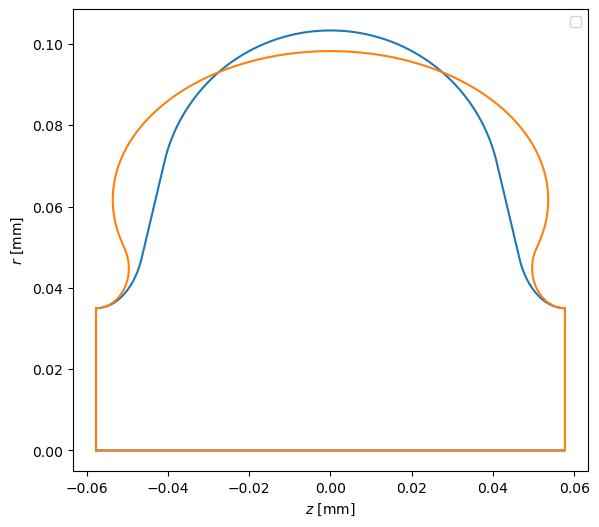

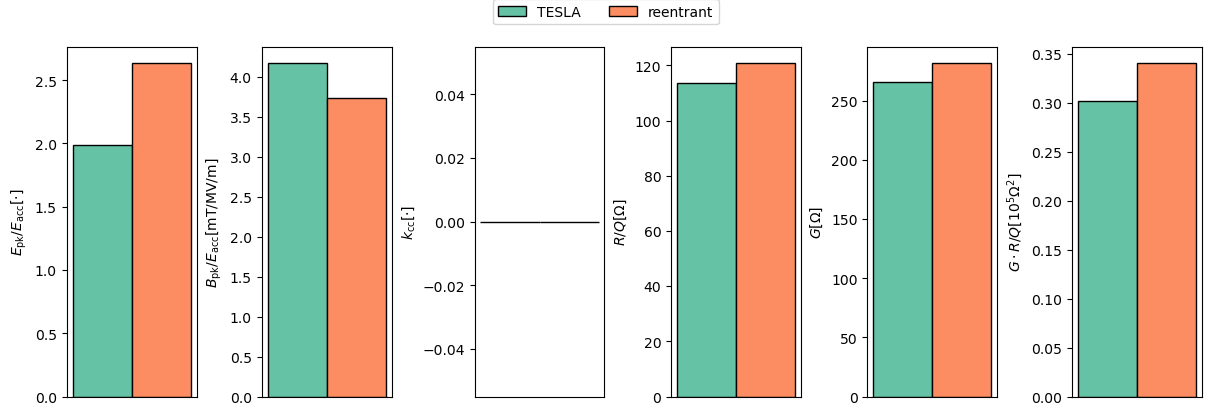

In [9]:
cavs = Cavities()
cavs.save(project_folder='D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

n_cells = 9
midcell = [42, 42, 12, 19, 35, 57.7, 103.353]
tesla_mid_cell = Cavity(1, midcell, midcell, midcell, beampipe='none')

shape_space = {'reentrant': 
                   {'IC': [53.58, 36.58, 8.08, 9.84, 35, 57.7, 98.27],
                    'OC': [53.58, 36.58, 8.08, 9.84, 35, 57.7, 98.27],
                    'OC_R': [53.58, 36.58, 8.08, 9.84, 35, 57.7, 98.27]
                    }
               }

# create cavity
shape = shape_space['reentrant']
reentrant_mid_cell = Cavity(1, shape['IC'], shape['IC'], shape['IC'], beampipe='none')

cavs.add_cavity([tesla_mid_cell, reentrant_mid_cell], names=['TESLA', 'reentrant'], plot_labels=['TESLA', 'reentrant'])

ax = cavs.plot('geometry')

cavs.run_eigenmode()
pp.pprint(cavs.eigenmode_qois)

cavs.plot_compare_fm_bar()